In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

In [ ]:
insurance_data = pd.read_csv('dka-solar-center-clean.csv', sep = ';', encoding='utf-8')
insurance_data = insurance_data.dropna()
insurance_data.head()

,Active_Energy_Delivered_Received,Current_Phase_Average,Active_Power,Weather_Temperature_Celsius,Weather_Relative_Humidity,Global_Horizontal_Radiation,Diffuse_Horizontal_Radiation,Wind_Direction,Radiation_Global_Tilted,Radiation_Diffuse_Tilted,timestamp_numeric
0,-2.093640,1.164251,1.104804,-0.269124,-0.456450,0.102260,0.118732,0.674570,0.495999,0.277903,-1.721576
1,-2.093623,1.121863,1.063080,-0.281528,-0.439317,0.052771,0.117507,0.368047,0.434983,0.263475,-1.721573
2,-2.093623,1.088796,1.031702,-0.281357,-0.446878,-0.001662,0.114417,0.204360,0.382837,0.292102,-1.721570
3,-2.093605,1.036087,0.980595,-0.291934,-0.456358,-0.055441,0.106098,0.437694,0.322501,0.240779,-1.721567
4,-2.093605,0.971351,0.918688,-0.297524,-0.445058,-0.111344,0.060196,0.515070,0.266088,0.201344,-1.721564


In [ ]:
df = insurance_data.copy()

# Метод кластеризации K-MEANS

---

Выберем два признака, по которым попытаемся провести кластеризацию, признаки выбраны таким образом, чтобы разрозненность в данных была наибольшей из возможных. Для визуализации будем использолвать sample размером 5000.

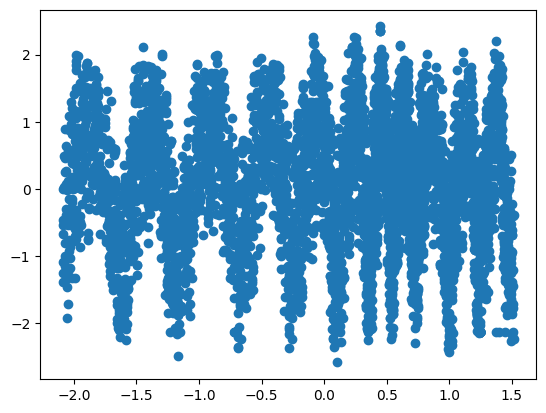

In [ ]:
short_data = df.sample(n = 5000, random_state=42)
plt.scatter('Active_Energy_Delivered_Received', 'Weather_Temperature_Celsius', data=short_data)
plt.show()

In [ ]:
X = df.loc[:, ['Active_Energy_Delivered_Received', 'Weather_Temperature_Celsius']]
X.head()

,Active_Energy_Delivered_Received,Weather_Temperature_Celsius
0,-2.093640,-0.269124
1,-2.093623,-0.281528
2,-2.093623,-0.281357
3,-2.093605,-0.291934
4,-2.093605,-0.297524


Выполним кластеризацию для количетсва кластеров от 2 до 10. Выведем оценку результатов на график и методом логтя определим оптимальное количество.

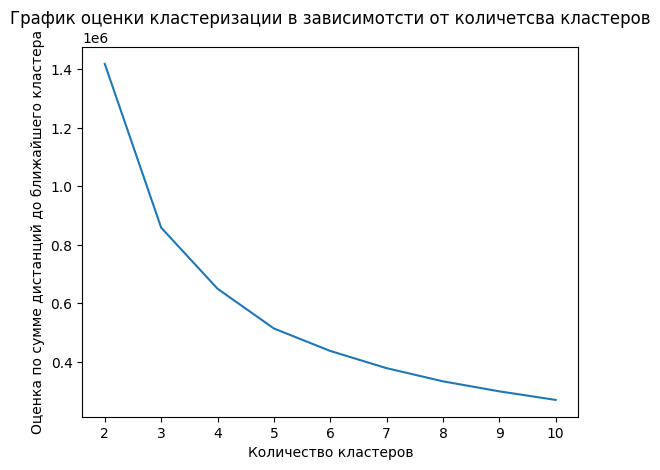

In [ ]:
from sklearn.cluster import KMeans

scores = []
nums_of_clusters = np.arange(2, 11)

for i in nums_of_clusters:
  kmeans = KMeans(n_clusters = i, init = 'random', random_state=42)
  kmeans.fit(X)

  scores.append(kmeans.inertia_)

plt.plot(nums_of_clusters, scores)
plt.xlabel("Количество кластеров")
plt.ylabel("Оценка по сумме дистанций до ближайшего кластера")
plt.title("График оценки кластеризации в зависимотсти от количетсва кластеров")
plt.show()

Очевидного перепада нет, но наиболее подходящее число - 5. Выполним кластеризацию с 5 кластерами и визуализируем с окрашиванием значений.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


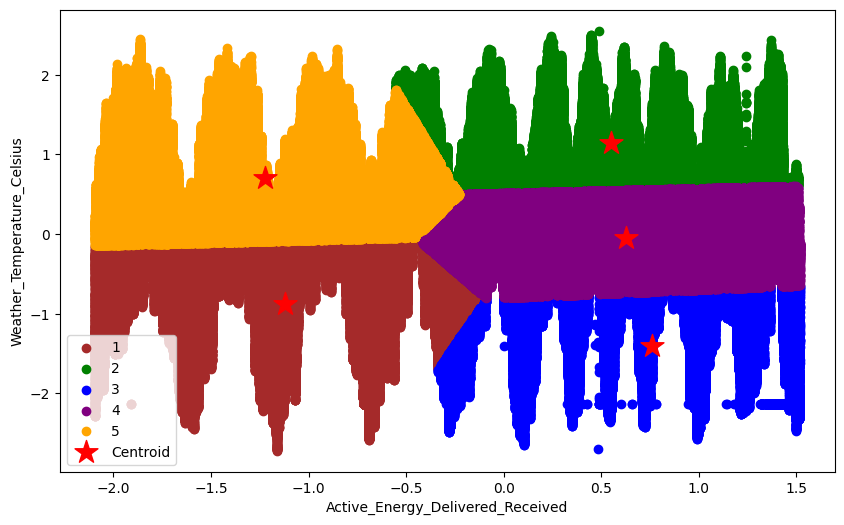

In [ ]:
kmeans = KMeans(n_clusters=5, init='random', random_state=42)
kmeans.fit(X)

x_pred = kmeans.predict(X)
X['Cluster'] = x_pred

plt.figure(figsize=(10, 6))
plt.scatter(X[X['Cluster'] == 0]['Active_Energy_Delivered_Received'], X[X['Cluster'] == 0]['Weather_Temperature_Celsius'], c = 'brown', label = '1')
plt.scatter(X[X['Cluster'] == 1]['Active_Energy_Delivered_Received'], X[X['Cluster'] == 1]['Weather_Temperature_Celsius'], c = 'green', label = '2')
plt.scatter(X[X['Cluster'] == 2]['Active_Energy_Delivered_Received'], X[X['Cluster'] == 2]['Weather_Temperature_Celsius'], c = 'blue', label = '3')
plt.scatter(X[X['Cluster'] == 3]['Active_Energy_Delivered_Received'], X[X['Cluster'] == 3]['Weather_Temperature_Celsius'], c = 'purple', label = '4')
plt.scatter(X[X['Cluster'] == 4]['Active_Energy_Delivered_Received'], X[X['Cluster'] == 4]['Weather_Temperature_Celsius'], c = 'orange', label = '5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')

plt.xlabel('Active_Energy_Delivered_Received')
plt.ylabel('Weather_Temperature_Celsius')
plt.legend()
plt.show()

# Иерархическая кластеризация

---

Поделим данные на 2 измерения с помощью PCA и с ними выполним кластеризацию.

In [ ]:
from sklearn.decomposition import PCA

X = df.copy()

pca = PCA(n_components=2)
x_reduce = pca.fit_transform(X)
x_reduce = pd.DataFrame(x_reduce)
x_reduce.columns = ['P1', 'P2']

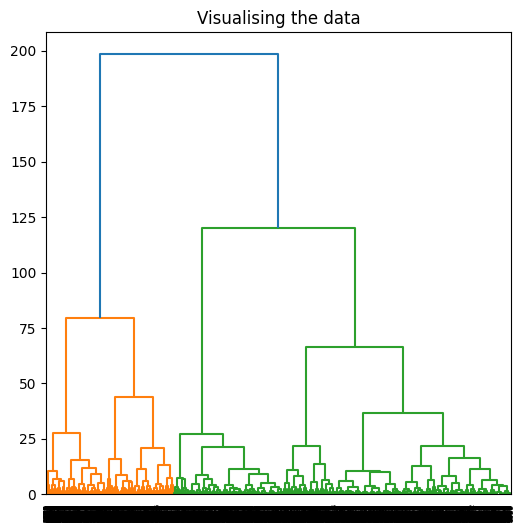

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize =(6, 6))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(x_reduce.sample(n=5000, random_state=42), method ='ward')))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

x_sample = x_reduce.sample(n=5000, random_state=42)
hc_Agg = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
y_hc = hc_Agg.fit_predict(x_sample)

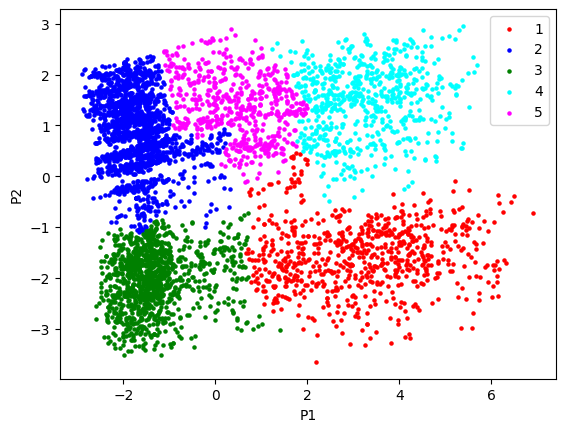

In [ ]:
plt.scatter(x_sample.iloc[y_hc == 0, 0], x_sample.iloc[y_hc == 0, 1], s = 5, c = 'red', label = '1')
plt.scatter(x_sample.iloc[y_hc == 1, 0], x_sample.iloc[y_hc == 1, 1], s = 5, c = 'blue', label = '2')
plt.scatter(x_sample.iloc[y_hc == 2, 0], x_sample.iloc[y_hc == 2, 1], s = 5, c = 'green', label = '3')
plt.scatter(x_sample.iloc[y_hc == 3, 0], x_sample.iloc[y_hc == 3, 1], s = 5, c = 'cyan', label = '4')
plt.scatter(x_sample.iloc[y_hc == 4, 0], x_sample.iloc[y_hc == 4, 1], s = 5, c = 'magenta', label = '5')
plt.xlabel('P1')
plt.ylabel('P2')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
silh_avg = silhouette_score(x_sample, y_hc)
print("Оценка silhouette: ", silh_avg)

Оценка silhouette:  0.4838080611449788


# DBSCAN


---



In [ ]:
from sklearn.decomposition import PCA

X = df.copy()

pca = PCA(n_components=2)
x_reduce = pca.fit_transform(X)
x_reduce = pd.DataFrame(x_reduce)
x_reduce.columns = ['P1', 'P2']
x_sample = x_reduce.sample(n=10000, random_state=42)

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.15, min_samples=5)
db.fit(x_sample)
clusters = db.fit_predict(x_sample)

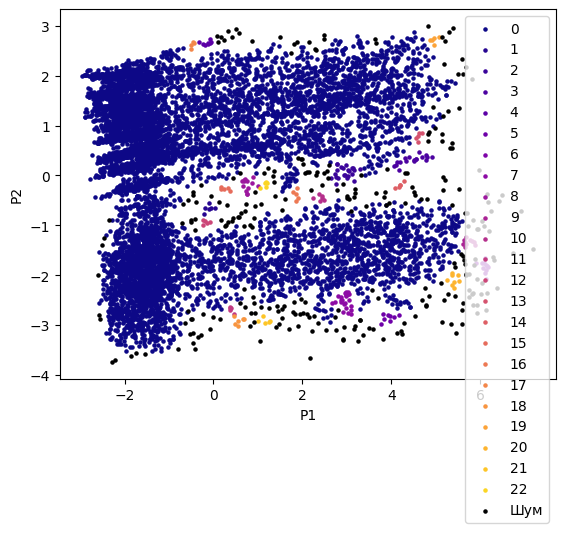

In [ ]:
cmap = plt.colormaps['plasma']

labels = db.labels_
for i in set(labels)-{-1}:
  plt.scatter(x_sample.iloc[clusters == i, 0], x_sample.iloc[clusters == i, 1], s = 5, color = cmap(i/len(set(labels))), label = f'{i}')
plt.scatter(x_sample.iloc[clusters == -1, 0], x_sample.iloc[clusters == -1, 1], s = 5, color = 'black', label = 'Шум')
plt.xlabel('P1')
plt.ylabel('P2')
plt.legend()
plt.show()

# Линейная регрессия


---



Выберем 2 пары признаков, один с сильной корреляцией, другой со средней. Разные данные взяты для того, чтобы посмотреть как покажет себя модель в разных случаях.

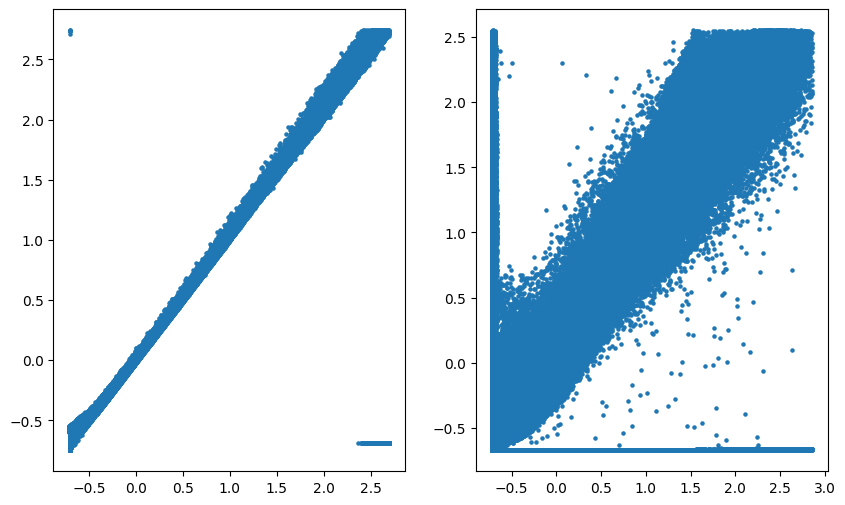

In [ ]:
f = plt.figure(figsize=(10, 6))
ax = f.add_subplot(121)
plt.scatter(df['Active_Power'], df['Current_Phase_Average'], s = 5)

ax = f.add_subplot(122)
plt.scatter(df['Global_Horizontal_Radiation'], df['Radiation_Global_Tilted'], s= 5)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

def lin_reg(x_train, x_test, y_train, y_test):
  lr = LinearRegression()
  lr.fit(x_train, y_train)
  coef = lr.coef_
  intercept = lr.intercept_
  y_pred = lr.predict(x_test)
  return coef, intercept, y_pred

In [ ]:
X = df[['Active_Power']]
Y = df[['Current_Phase_Average']]
x_train_ac, x_test_ac, y_train_ac, y_test_ac = train_test_split(X, Y, test_size=0.2, random_state=42)
X = df[['Global_Horizontal_Radiation']]
Y = df[['Radiation_Global_Tilted']]
x_train_gr, x_test_gr, y_train_gr, y_test_gr = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
coef_1, intercept_1, y_pred_ac = lin_reg(x_train_ac, x_test_ac, y_train_ac, y_test_ac)
coef_2, intercept_2, y_pred_gr = lin_reg(x_train_gr, x_test_gr, y_train_gr, y_test_gr)

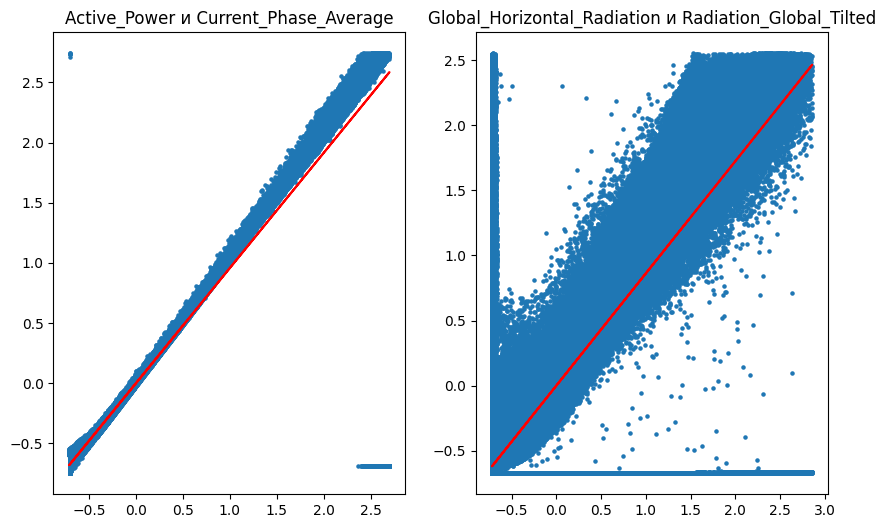

In [ ]:
f = plt.figure(figsize=(10, 6))
ax = f.add_subplot(121)
plt.scatter(df['Active_Power'], df['Current_Phase_Average'], s = 5)
plt.plot(x_test_ac, x_test_ac*coef_1 + intercept_1, color='red')
plt.title('Active_Power и Current_Phase_Average')

ax = f.add_subplot(122)
plt.scatter(df['Global_Horizontal_Radiation'], df['Radiation_Global_Tilted'], s= 5)
plt.plot(x_test_gr, x_test_gr*coef_2 + intercept_2, color='red')
plt.title('Global_Horizontal_Radiation и Radiation_Global_Tilted')
plt.show()

Так как данные не до конца очищены от выбросов, то присутствует отклонение прямой от общего вектора, которое видно на графиках. Оценим качество регрессии по mean_squared_error.

In [ ]:
from sklearn.metrics import mean_squared_error
print("mean_squared_error для признаков Active_Power и Current_Phase_Average: ", mean_squared_error(y_test_ac, y_pred_ac))
print("mean_squared_error для признаков Global_Horizontal_Radiation и Radiation_Global_Tilted: ", mean_squared_error(y_test_gr, y_pred_gr))

mean_squared_error для признаков Active_Power и Current_Phase_Average:  0.08281916127405937
mean_squared_error для признаков Global_Horizontal_Radiation и Radiation_Global_Tilted:  0.2561171892439395


# LASSO


---



In [ ]:
X = df.drop('Active_Power', axis=1)
Y = df['Active_Power']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
max_iter = [1000, 10000, 100000]

lasso_gscv = GridSearchCV(estimator=Lasso(), param_grid={'alpha': alpha, 'max_iter': max_iter},
                          scoring='neg_mean_absolute_error', cv=5, refit=False)
lasso_gscv.fit(x_train, y_train)
lasso_gscv.best_params_

{'alpha': 0.01, 'max_iter': 1000}

In [ ]:
lasso = Lasso(alpha = lasso_gscv.best_params_['alpha'], max_iter = lasso_gscv.best_params_['max_iter'])
lasso.fit(x_train, y_train)

Lasso(alpha=0.01)

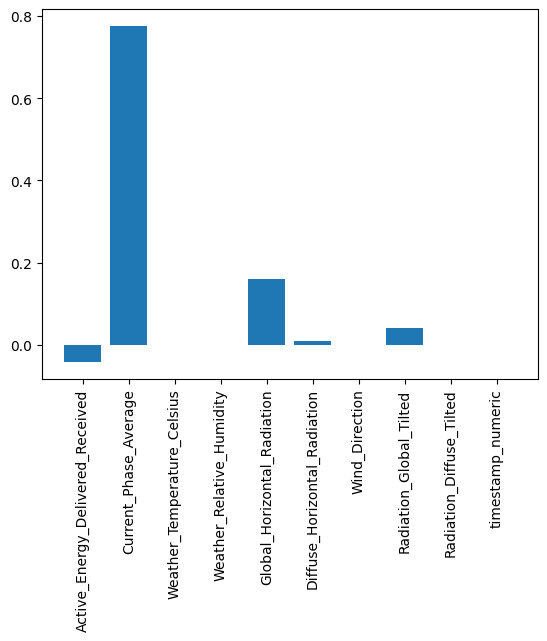

In [ ]:
feature_importance = lasso.coef_
feature_names = X.columns

plt.bar(feature_names, feature_importance)
plt.xticks(rotation=90)
plt.show()

In [ ]:
print("Обучающая выборка: ", lasso.score(x_train, y_train))
print("Тестовая выборка: ", lasso.score(x_test, y_test))

Обучающая выборка:  0.9308736348193432
Тестовая выборка:  0.9318220029668015


# Ridge


---



In [ ]:
X = df.drop('Active_Power', axis=1)
Y = df['Active_Power']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
ridge_gscv = GridSearchCV(estimator=Ridge(), param_grid={'alpha': alpha}, scoring='neg_mean_absolute_error', cv=5, refit=False)

ridge_gscv.fit(x_train, y_train)
ridge_gscv.best_params_

{'alpha': 0.0001}

In [ ]:
ridge = Ridge(alpha = ridge_gscv.best_params_['alpha'])
ridge.fit(x_train, y_train)

Ridge(alpha=0.0001)

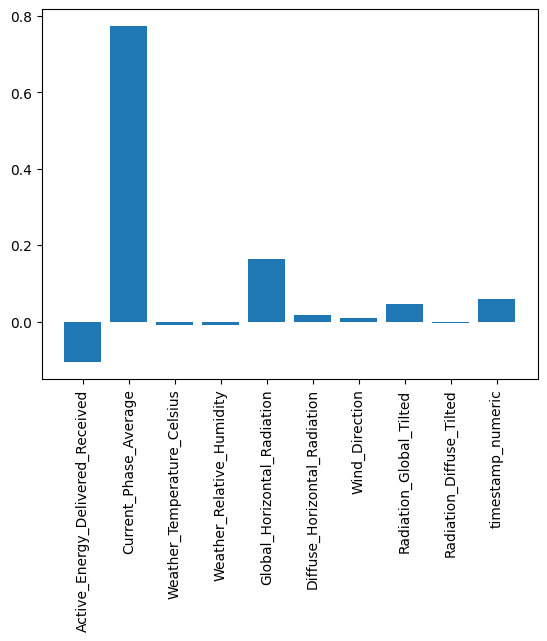

In [ ]:
coef = ridge.coef_
names = X.columns

plt.bar(names, coef)
plt.xticks(rotation=90)
plt.show()

In [ ]:
print("Обучающая выборка: ", ridge.score(x_train, y_train))
print("Тестовая выборка: ", ridge.score(x_test, y_test))

Обучающая выборка:  0.9313057084016074
Тестовая выборка:  0.9322137316552348
